In [631]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [728]:
x = [0.5, 2.5]
y= [0.2, 0.9]

In [729]:
W1=np.random.rand(1,3)[0]

In [730]:
W1

array([0.93591114, 0.84777785, 0.98931946])

In [731]:
W2=np.random.rand(3,1).T[0]

In [732]:
W2

array([0.24495595, 0.64954885, 0.10271873])

In [733]:
b1=np.random.rand(1,3)[0]

In [734]:
b1

array([0.0649309 , 0.64359257, 0.39728601])

In [735]:
b2=np.random.rand(1,1)[0]

In [736]:
b2

array([0.98355151])

In [737]:
A1=np.dot(x[0],W1)+b1

In [738]:
A1

array([0.53288647, 1.0674815 , 0.89194574])

In [739]:
np.dot(sigmoid(A1),W2)

1.7570147061859673

In [740]:
sigmoid(1)

1.5819767068693265

In [741]:
def sigmoid(A):
    return (1/(1-np.exp(-A))) 

In [742]:
def forward_prop(W1,W2,b1,b2,X):
    A1=np.dot(X,W1)+b1
    Z1=sigmoid(A1)
    A2=np.dot(Z1,W2)+b2
    Z2=sigmoid(A2)
    return A1,Z1,A2,Z2   

In [743]:
def calc_se_loss(Z2,Y):
    return (Z2-Y)**2/2
    

In [744]:
def backprop(A1,Z1,A2,Z2,Y,W2,b2):
    deltafinal=(Z2[0]-Y)*Z2[0]*(1-Z2[0])
    deltabias=deltafinal*b2[0]*sigmoid(1)*(1-sigmoid(1))
    delta11=deltafinal*W2[0]*Z1[0]*(1-Z1[0])
    delta12=deltafinal*W2[1]*Z1[1]*(1-Z1[1])
    delta13=deltafinal*W2[2]*Z1[2]*(1-Z1[2])
    return deltafinal,delta11,delta12,delta13,deltabias

In [745]:
def update_weights(W1losssum,W2losssum,b1lossum,b2losssum):
    eta=0.1
    W2[0]-=eta*W2losssum[0]
    W2[1]-=eta*W2losssum[1]
    W2[2]-=eta*W2losssum[2]
    b2[0]-=eta*b2lossum
    W1[0]-=eta*W1losssum[0]
    W1[1]-=eta*W1losssum[1]
    W1[2]-=eta*W1losssum[2]
    b1[0]-=eta*b1lossum[0]
    b1[1]-=eta*b1lossum[1]
    b1[2]-=eta*b1lossum[2]
    return W1,W2,b1,b2
    
    
    

In [746]:
W1losssum=[0,0,0]
W2losssum=[0,0,0]
b1lossum=[0,0,0]
b2lossum=0
errors=[]
W1s=[]
W2s=[]
b1s=[]
b2s=[]
for j in range(1,50):
    error=[]
    for i in range(len(x)):
        A1,Z1,A2,Z2=forward_prop(W1,W2,b1,b2,x[i])
        error.append(calc_se_loss(Z2,y[0]))
        df,d11,d12,d13,db=backprop(A1,Z1,A2,Z2,y[i],W2,b2)
        for j in range(3):
            W2losssum[i]+=A1[i]*df
        W1losssum[0]+=x[i]*d11
        W1losssum[1]+=x[i]*d12
        W1losssum[2]+=x[i]*d13
        b1lossum[0]+=d11
        b1lossum[1]+=d12
        b1lossum[2]+=d13
        b2lossum+=df
    W1,W2,b1,b2=update_weights(W1losssum,W2losssum,b1lossum,b2lossum)
    W1s.append(W1.mean())
    W2s.append(W2.mean())
    b1s.append(b1.mean())
    b2s.append(b2.mean())
    #print(W1,W2.T,b1,b2)
    error=np.array(error)
    errors.append(error.sum())
    


In [747]:
len(errors)==len(W1s)

True

Text(0, 0.5, 'root mean square error')

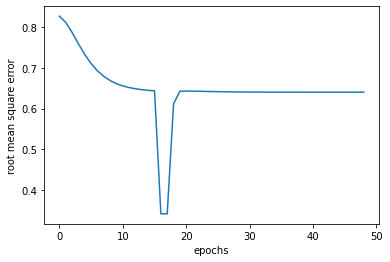

In [748]:
plt.plot(np.arange(len(errors)),errors)
plt.xlabel("epochs")
plt.ylabel("root mean square error")

In [749]:
W1.mean()

37.03319937497534

In [750]:
from mpl_toolkits import mplot3d

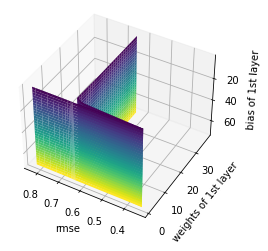

In [751]:
fig=plt.figure()
ax=plt.axes(projection='3d')
W1s,b1s=np.meshgrid(W1s, b1s)
ax.plot_surface(errors,W1s,b1s,cmap='viridis')
ax.set_xlabel("rmse")
ax.set_ylabel("weights of 1st layer")
ax.set_zlabel("bias of 1st layer")
ax.view_init(-140, 60)

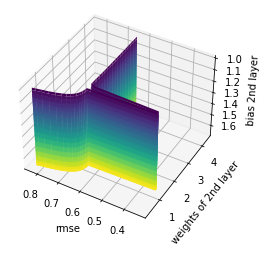

In [752]:
fig=plt.figure()
ax=plt.axes(projection='3d')
W2s,b2s=np.meshgrid(W2s, b2s)
ax.plot_surface(errors,W2s,b2s,cmap='viridis')
ax.set_xlabel("rmse")
ax.set_ylabel("weights of 2nd layer")
ax.set_zlabel("bias 2nd layer")
ax.view_init(-140, 60)